#  UK domestic flights analyse with Python & NetworkX
### Source of data
http://www.bifi.es/~cardillo/data.html
### Data description
A temporal network of domestic flights operated in the United Kingdom between 1990 and 2003. Each of the 14 years is encoded as a separate network. Nodes are UK airports, and an edge represents a direct flight from one to another. Edges are weighted by the total number of passengers transported over the year. Nodes include spatial coordinates and the name of the nearby city.

The network is weighted and undirected.

More details about this dataset can be found in the paper: 

https://arxiv.org/abs/1807.00565

The data have been found in the website of the United Kingdom Civil Aviation Authority (CAA), available at the following URL:

https://www.caa.co.uk/Airline_data_historic/

## Download and load data

In [1]:
import requests
url = "http://www.bifi.es/~cardillo/datasets/uk-air-time_varying.zip"
content = requests.get(url)

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
f = ZipFile(BytesIO(content.content))

import pandas as pd 
fileName = "Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_2003_adjlist.csv"
data = pd.read_csv(f.open(fileName), sep = ';', usecols= [0,1,2]) 

data.head()

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,483226
1,HEATHROW,BELFAST CITY,743758
2,HEATHROW,BELFAST INTERNATIONAL,25963
3,HEATHROW,EDINBURGH,1577063
4,HEATHROW,GLASGOW,1345532


## Create graph

In [2]:
import networkx as nx

g=nx.from_pandas_edgelist(data,
                          source='#this_apt_name',
                          target='that_apt_name',
                          edge_attr='passengers',
                          create_using=nx.Graph())

## Analyzing gaphs

Some stats

In [3]:
print(f'Number of nodes in graph: {g.number_of_nodes()}')
print(f'Number of edges in graph: {g.number_of_edges()}')
print(f'Graph density: {nx.density(g)}')
print(f'Graph diameter: {nx.diameter(g)}')
print(f'Graph order: {g.order()}')
print(f'Graph size: {g.size()}')

Number of nodes in graph: 46
Number of edges in graph: 238
Graph density: 0.22995169082125605
Graph diameter: 4
Graph order: 46
Graph size: 238


Show degree (all passengers) for every node.

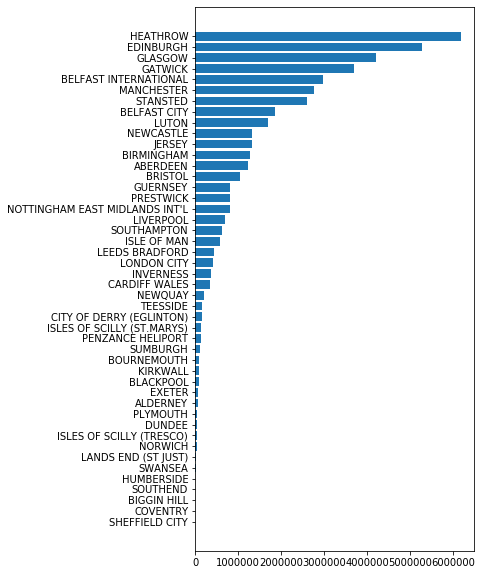

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

degree = dict(g.degree(weight='passengers'))
sorted_degree = {r: degree[r] for r in sorted(degree, key=degree.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_degree.keys()), sorted_degree.values())
plt.show()

Show degree centrality for every node.

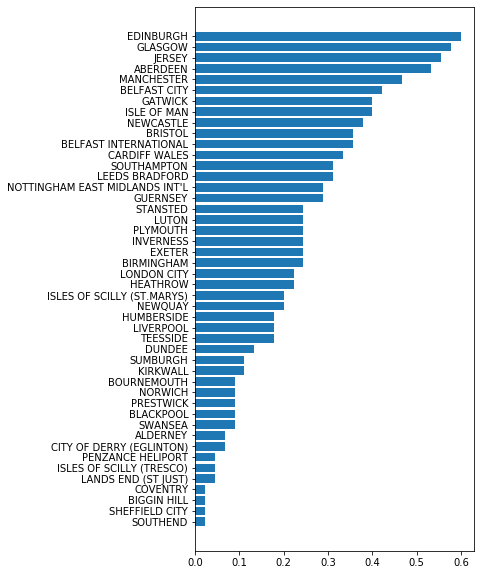

In [6]:
degree_centrality = dict(nx.degree_centrality(g))
sorted_degree_centrality = {r: degree_centrality[r] for r in sorted(degree_centrality, key=degree_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_degree_centrality.keys()), sorted_degree_centrality.values())
plt.show()

Show betweenness centrality for every node.

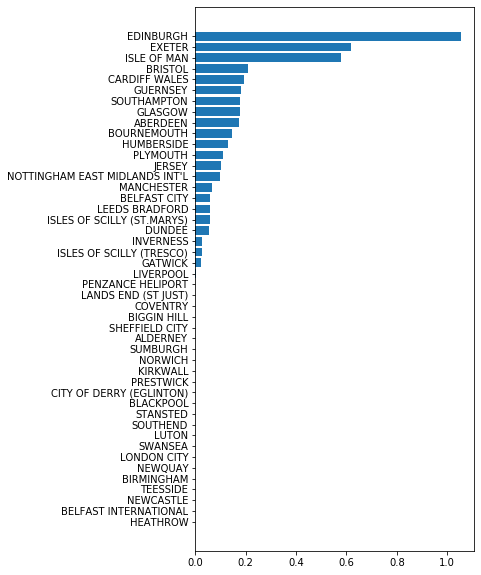

In [7]:
betweenness_centrality = dict(nx.betweenness_centrality(g, weight='passengers'))
sorted_betweenness_centrality = {r: betweenness_centrality[r] for r in sorted(betweenness_centrality, key=betweenness_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_betweenness_centrality.keys()), sorted_betweenness_centrality.values())
plt.show()

Compute the clustering coefficient for every node.

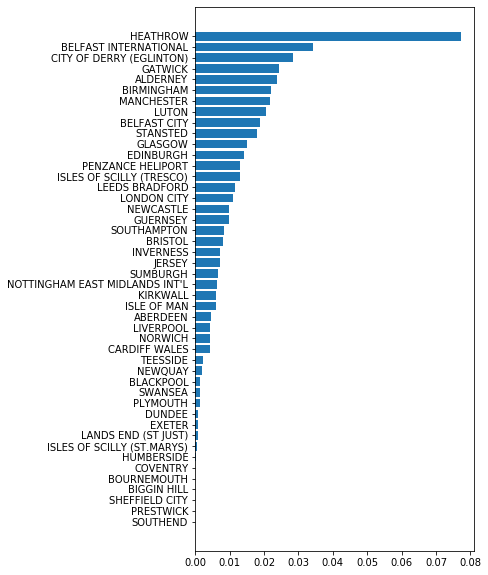

In [8]:
clustering_coefficient = nx.clustering(g, weight='passengers')
sorted_clustering_coefficient = {r: clustering_coefficient[r] for r in sorted(clustering_coefficient, key=clustering_coefficient.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_clustering_coefficient.keys()), sorted_clustering_coefficient.values())
plt.show()

Show closeness centrality for every node.

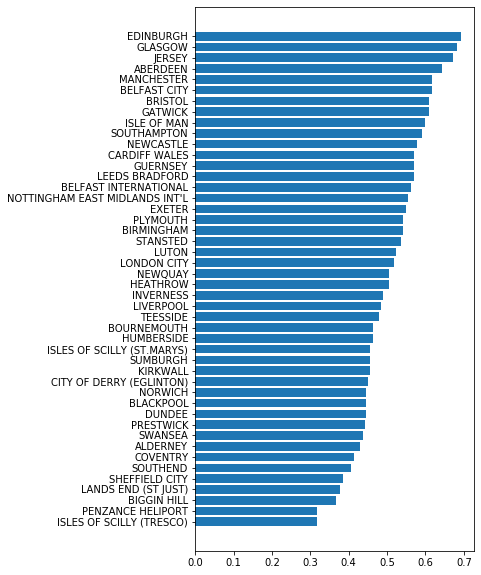

In [9]:
closeness_centrality = dict(nx.closeness_centrality(g))
sorted_closeness_centrality = {r: closeness_centrality[r] for r in sorted(closeness_centrality, key=closeness_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_closeness_centrality.keys()), sorted_closeness_centrality.values())
plt.show()

Show page rank for every node.

In [ ]:
pagerank = dict(nx.pagerank(g, weight='passengers'))
sorted_pagerank = {r: pagerank[r] for r in sorted(pagerank, key=pagerank.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_pagerank.keys()), sorted_pagerank.values())
plt.show()

Full graph

In [ ]:
nx.draw_kamada_kawai(g, node_size=100, weight='passengers')

The most important nodes graph (above average node passengers)

In [ ]:
degrees = dict(g.degree(weight='passengers')).values()
avg = sum(degrees) / len(degrees)

selected_nodes = {k: v for k, v in dict(g.degree(weight='passengers')).items() if v > avg}
subgraph = g.subgraph(selected_nodes)
nx.draw_kamada_kawai(subgraph, node_size=100, with_labels=True, label_color='r', weight='passengers')

Input and output degree for each node

In [ ]:
#TODO in_degree and out_degree because of undirected graph (will be the same)

airports = dict(g.degree(weight='passengers')).keys()

datas = []

for key in airports:
    data = {}
    data['Name'] = key
    data['Degree'] = g.degree(key, weight='passengers')
    data['In-degree'] = g.in_degree(key, weight='passengers')
    data['Out-degree'] = g.out_degree(key, weight='passengers')
    datas.append(data)

import tabulate

header = ['Name', 'Degree','In-degree','Out-degree']
rows =  [x.values() for x in datas]
print(tabulate.tabulate(rows, header, "fancy_grid"))

Successors and predecessors degree for each node

In [ ]:
#TODO successors and predecessors not exist because of undirected graph

datas = []

for key in airports:
    data = {}
    data['Name'] = key
    data['Successors'] = '\n'.join(list(g.successors(key)))
    data['Predecessors'] = '\n'.join(list(g.predecessors(key)))
    datas.append(data)

header = ['Name', 'Successors','Predecessors']
rows =  [x.values() for x in datas]
print(tabulate.tabulate(rows, header, "fancy_grid"))

In [ ]:
#TODO find a way how extend this table to screen

datas = []

for key1 in list(airports)[:3]:
  data = {}
  data['X'] = key1
  for key2 in list(airports)[:3]:
    if (key1 == key2):
      data[key2] = ''
    else:
      try:
        data[key2] = ' +\n'.join(nx.shortest_path(g, key1, key2)) 
      except:
        data[key2] = '-'
  datas.append(data)

header = list(airports)[:3]
rows =  [x.values() for x in datas]
print(tabulate.tabulate(rows, header, "fancy_grid"))

In [ ]:
nx.shortest_path(g, 'ABERDEEN', 'HEATHROW')

## Temporary playground

In [ ]:
#nx.get_edge_attributes(g,'passengers')
#nx.attr_matrix(g, node_attr='passengers', normalized=True)
#g["HEATHROW"]

#for item in dict(g["HEATHROW"]): print(type(item))
    
#dict(g["HEATHROW"]).values()

#dict(g.degree(weight='passengers'))

#dict(g.degree(weight='passengers'))
values = dict(g.degree(weight='passengers')).values()
avg = sum(values) / len(values)

#dict(g.degree(weight='passengers'))

#to_remove = list(filter(lambda (k,v): (v < avg), dict(g.degree(weight='passengers')).items()))
#selected_nodes = {k: v for k, v in dict(g.degree(weight='passengers')).items() if v > avg}
#H = g.subgraph(selected_nodes)
#dict(H.degree(weight='passengers'))


#list(takewhile(lambda c: len(c) < 7, fruit))

#to_remove = []
#for (k,v) in dict(g.degree(weight='passengers')).items():
#    if (v < avg)
#        to_remove.append(k)
    
#to_remove

#H = g.copy()
#H.remove_node('HEATHROW')
#dict(H.degree(weight='passengers'))
